# Project: Investigate a Dataset - [No_Show Appointment]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset contains information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. It contains 14 columns (variables). Below is a brief description of the columns (variables) and their significance.


1. PatientID - This column represents the identification number of a patient.
2. AppintmentID - This column represents the patient appointment identification number.
3. Gender - This column represents the sex of the patient (i.e Male or Female).
4. ScheduledDay - This column represents the day the patient registered for an appointment with the doctor.
5. AppointmentDay - This column represents the actual day the patient visited the doctor.
6. Age - This column represents the age of the patient or how old the patient is.
7. Neigbourhood - This column represents where the appointment took place.
8. Scholarship - this column gives more information about the patient. It states if the patient's medical bills were or were not sponsored by the Bolsa Famila 
9. Hypertension - This column specifies the type of disease the patient has.
10. Diabetes - This column specifies the type of disease the patient has.
11. Alcoholism - This column specifies the type of disease the patient has.
12. Handicap - This column specifies the type of disease the patient has.
13. SMS_received - This column tells us if an sms message was sent to the patient
14. No_show - This column tells us of the attitude of the patient i.e if the patient showed up for an appointment or not.

The dependable variable is the No_show column

The independent variables are: PatientID, AppintmentID, Gender, ScheduledDay, AppointmentDay, Age, Scholarship, Neigbourhood, Hypertension, Diabetes, Alcoholism, Handicap and SMS_received 



### Question(s) for Analysis
I am concerned with the factors that can help predict if a patient will show up for their appointment or not. To this end I consider the following:

1. Will the patient show-up if they did or did not recieve SMS message?
2. If the medical bill is sponsored will the patient show-up for appointment?


## Importing packages required to analyse dataset



In [1]:
#Importing necessary packages required to analyse this dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [11]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==1.1.5

Requirement already up-to-date: pandas==1.1.5 in /opt/conda/lib/python3.6/site-packages (1.1.5)


# <a id='wrangling'></a>
## Data Wrangling

 


##  Loading data into Pandas DataFrame from the CSV file

In [2]:
# Load your data and print out first 10 rows of the dataset
df = pd.read_csv("Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv")


In [3]:
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [4]:
#printing last 10 rows of the dataset
df.tail(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110517,5.574942e+12,5780122,F,2016-06-07T07:38:34Z,2016-06-07T00:00:00Z,19,MARIA ORTIZ,0,0,0,0,0,0,No
110518,7.263315e+13,5630375,F,2016-04-27T15:15:06Z,2016-06-07T00:00:00Z,50,MARIA ORTIZ,0,0,0,0,0,1,No
110519,6.542388e+13,5630447,F,2016-04-27T15:23:14Z,2016-06-07T00:00:00Z,22,MARIA ORTIZ,0,0,0,0,0,1,No
110520,9.969977e+14,5650534,F,2016-05-03T07:51:47Z,2016-06-07T00:00:00Z,42,MARIA ORTIZ,0,0,0,0,0,1,No
110521,3.635534e+13,5651072,F,2016-05-03T08:23:40Z,2016-06-07T00:00:00Z,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


### Data Inspection

In [5]:
# To display tupule of the dimensions of the dataset
df.shape

(110527, 14)

In [6]:
# print the datatypes of the columns
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [10]:
# to display a coincise summary of dataframe plus null value in each column
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
# to return number of unique values in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [8]:
#to return useful descriptive statistics for each column of data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The result above shows:
I) minimum age is a negative number. it shows that the column contains an erroneous value because age can never be negative. 
II) The Maximum Value in the Handcap column is 5. It is supposed to take Boolean values of 0 or 1.
There is the need to print the values in these columns during inspection.

### A) inspecting Handicap Column

In [6]:
#To display values used in the Handap column.
df.Handcap.unique()

array([0, 1, 2, 3, 4])

### B) inspecting Age Column

In [10]:
# check to see if there are errors with the ages. look out for decimal numbers and negative numbers.
# display the all ages of the patients
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

According to
https://en.wikipedia.org/wiki/Child_development#:~:text=Some%20age%2Drelated%20development%20periods,ages%2012%E2%80%9318%20years) some age-related development periods and examples of defined intervals include
a) newborn (ages 0–4 weeks); 

In [12]:
#To display total number of patients aged 0 years in the dataset
df.query('0 == Age').shape[0]

3539

In [13]:
#To display total number of patients aged 0 years in the dataset
df.query('1 == Age').shape[0]

2273

In [15]:
# To display the kind of diseases patients with age 0 have, 
df[(df.Age == 0) & ((df.Hipertension == 1) | (df.Diabetes== 1) | (df.Alcoholism == 1) | (df.Handcap == 1))]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
98247,3.647246e+14,5788682,F,2016-06-08T13:18:12Z,2016-06-08T00:00:00Z,0,JABOUR,0,0,0,0,1,0,No


In [16]:
#To display total patients aged 100 years and above in the dataset 
df.query('100 <= Age').shape[0]

11

In [14]:
#To display total patients aged 100 years and above in the dataset with the type of sicknesss they have
df.query('100 <= Age')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
58014,9.762948e+14,5651757,F,2016-05-03T09:14:53Z,2016-05-03T00:00:00Z,102,CONQUISTA,0,0,0,0,0,0,No
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
79270,9.739430e+12,5747809,M,2016-05-30T16:21:56Z,2016-05-31T00:00:00Z,100,TABUAZEIRO,0,0,0,0,1,0,No
79272,9.739430e+12,5747808,M,2016-05-30T16:21:56Z,2016-05-31T00:00:00Z,100,TABUAZEIRO,0,0,0,0,1,0,No
90372,2.342836e+11,5751563,F,2016-05-31T10:19:49Z,2016-06-02T00:00:00Z,102,MARIA ORTIZ,0,0,0,0,0,0,No
92084,5.578313e+13,5670914,F,2016-05-06T14:55:36Z,2016-06-03T00:00:00Z,100,ANTÔNIO HONÓRIO,0,0,0,0,0,1,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


### c) inspecting spelling errors

In [15]:
# To check for spelling errors with column names
name_of_column = list(df.columns)
# To print the column names as a list
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

### d) Check for duplicates

In [16]:
df.duplicated().value_counts()

False    110527
dtype: int64

In [21]:
sum(df.duplicated())

0

## Comprehensive summary of observation and solutions to the problems found

After inspection, the following were observed:

1) There are 110527 rows in the dataset and 14 columns.
2) There are 3539 patients aged 0 years.
3) Patients aged 0 years are handicapped. They do not suffer from diabetics, hypertension and neither are they alcoholic
4) Some column names were spelt wrongly eg handcap. 
6) The handicap column did not have boolean values. A patient who is handicapped is assigned a value of 1 and if not handicapped a value 0. In other to correct this, any column that contains a number greater than 0 will be assigned 1 
7) The age column contained an erronous value of minus one. This might be due to typographic error. After checking to see the total number of rows with age of 1 years we found that there are 2273 patients that are a year old. It is safe to drop the row with errors since it will not have significant effect on the result.
8) There are eleven patients whose ages are greater than or equals to 100 years. Majority of them are handicapped.
9) No missing values was found.
10) There are no duplicate files in the dtaset
11) It was also observed that the ScheduledDay and AppointmentDay columns were read as objects (strings) instead of Date Time object we wont be converting it since we are not performing time difference.
12) from the Pdf file and the dataset it is seen that in the No-show column if the patient showed up to their appointment the person is assigned 'No and ‘Yes’ if they did not show up.



# Data Cleaning
 
### Renaming column


In [9]:
#user-defined function to rename column

def rename_column(df, old_columns, new_columns):
    if len(old_columns) !=len(new_columns):
        return print('Error!!! Number of old_columns must be equal to number of new_colums')
    else:
        for i in range(len(old_columns)):
            df.rename(columns = { old_columns[i] : new_columns[i] }, inplace = True)
        return df

In [10]:
#renaming columns if user-defined function is called
old_columns = ['ScheduledDay', 'PatientId', 'AppointmentDay', 'AppointmentID', 'Handcap', 'Hipertension', 'No-show']
new_columns = ['Scheduled_Day', 'Patient_Id', 'Appointment_Day', 'Appointment_ID', 'Handicap', 'Hypertension', 'No_show']
rename_column(df, old_columns, new_columns)


,Patient_Id,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [11]:
# display first 3 rows of dataset to view changes made
df.head(3)

,Patient_Id,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


### Dropping rows that contain erronous values

In [12]:
# To drop the row of the patient with age -1
df.drop(df[df['Age'] == -1].index, axis = 0, inplace = True)

In [13]:
# check to confirm that the changes has been effected.
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99])

In [14]:
df['Handicap'] = np.where(df['Handicap']>0, 1, 0)

In [26]:
#check to confirm that the changes has been effected.
df.Handicap.unique()

array([0, 1])

In [15]:
# check if the data types of columns are in good shape 
df.dtypes

Patient_Id         float64
Appointment_ID       int64
Gender              object
Scheduled_Day       object
Appointment_Day     object
Age                  int64
Neighbourhood       object
Scholarship          int64
Hypertension         int64
Diabetes             int64
Alcoholism           int64
Handicap             int64
SMS_received         int64
No_show             object
dtype: object

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
Patient_Id         110526 non-null float64
Appointment_ID     110526 non-null int64
Gender             110526 non-null object
Scheduled_Day      110526 non-null object
Appointment_Day    110526 non-null object
Age                110526 non-null int64
Neighbourhood      110526 non-null object
Scholarship        110526 non-null int64
Hypertension       110526 non-null int64
Diabetes           110526 non-null int64
Alcoholism         110526 non-null int64
Handicap           110526 non-null int64
SMS_received       110526 non-null int64
No_show            110526 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


In [17]:
df.head(4)

,Patient_Id,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No


In [32]:
# comprehensive summary of dataset after cleaning
df.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
Patient_Id         110526 non-null float64
Appointment_ID     110526 non-null int64
Gender             110526 non-null object
Scheduled_Day      110526 non-null object
Appointment_Day    110526 non-null object
Age                110526 non-null int64
Neighbourhood      110526 non-null object
Scholarship        110526 non-null int64
Hypertension       110526 non-null int64
Diabetes           110526 non-null int64
Alcoholism         110526 non-null int64
Handicap           110526 non-null int64
SMS_Received       110526 non-null int64
No_Show            110526 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


After cleaning:
1) The rows in the dataset  reduced from 110527 to 110526 because we dropped the row where the age was equal to -1.
2) The columns in the dataset is still 14 in number
3) The datatypes of the columns are in the correct order

In [18]:
df.head(2)

,Patient_Id,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [19]:
#code to change 'No' to 'showed' in the 'No_show' column
df.loc [df['No_show'] == 'No', 'No_show'] = 'Showed'

#code to change 'Yes' to 'Missed' in the 'No_show' column
df.loc [df['No_show'] == 'Yes', 'No_show'] = 'Missed'

In [20]:
#code to view if changes has been effected.
df.head(4)

,Patient_Id,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,Showed
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,Showed
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,Showed
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Showed


The 'yes' and 'No' entries in the 'no_show' column is confusing. For clarity, I  changed the 'No' to 'Showed' to represent patients that showed up to their appointments and 'Yes' to 'Missed' indicating those that didnt show up for their appointment.



<a id='eda'></a>
## Exploratory Data Analysis

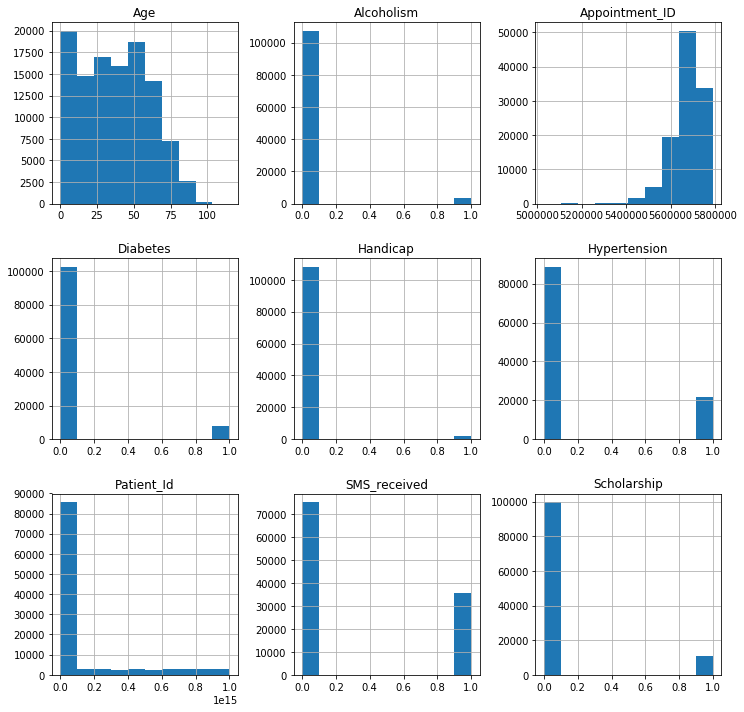

In [21]:
#Printing to explore the data
df.hist(figsize = (12,12));

### Research Question 1  (Will the patient show-up if they did or did not recieve SMS message?)

In [23]:
# code to group  patients that recieved sms into show_up or missed and storing. this will be stored in a variable called 'sms_reminder'
sms = df.groupby('SMS_received').No_show.value_counts()

In [25]:
#view the grouping of people that recieved sms
sms

SMS_received  No_show
0             Showed     62509
              Missed     12535
1             Showed     25698
              Missed      9784
Name: No_show, dtype: int64

Patients that did not recieve sms = 0 and Patients that recieved sms = 1


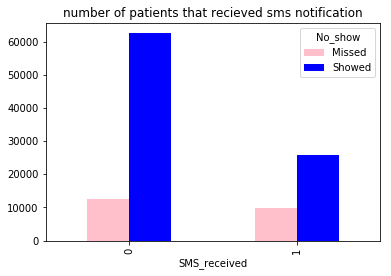

In [26]:
#code to create a dictinary that maps 1 and 0 to 'received' and 'not recieved'
sms_status = {1:'received', 0:'Not received'}

#plotting a chart that shows the number of patients that recieved an sms reminder
sms_reminder = sms_reminder.unstack()
sms_reminder.plot(kind='bar', color = ['pink', 'blue'], title = 'number of patients that recieved sms notification')
print ('Patients that did not recieve sms = 0 and Patients that recieved sms = 1' )


### Observation
It is seen that the patients who didn't receive SMS showed up more than those who received SMS.

### Research Question 2  (What was the Percentage of Patients that Showed Up for Appointment?)

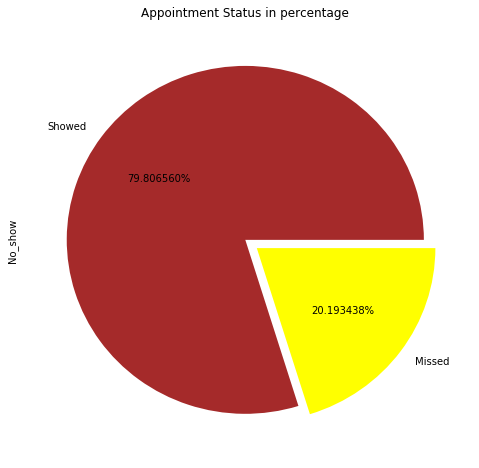

In [27]:
#this code will plot a piechart to show the percentage of patients that those who showed up vs those that missed an appointment.
df.No_show.value_counts().plot.pie(figsize=(8,8), colors = ['brown', 'yellow'], title = 'Appointment Status in percentage', autopct='%.6f%%', explode=(0, .08))
plt.show()


## Research Question 3: What gender show up more for appointment?

In [28]:
# code to show total count of patients that missed their appointment vs those who showed up
df[["Gender", "No_show"]].groupby("No_show").count()

,Gender
No_show,
Missed,22319
Showed,88207


it is seen that 22316 patients missed their appointment and  88205 patients showed up for their appointents.

In [29]:
# code to show the number of females and males that showed up or missed their appointment
df.groupby('Gender').No_show.value_counts()

Gender  No_show
F       Showed     57245
        Missed     14594
M       Showed     30962
        Missed      7725
Name: No_show, dtype: int64

In [32]:
#code that will get row that contains female and male that missed their appointment and store it in a variable called 'Appointmentmissed_female' and 'Appointmentmissed_male' respectively

Appointmentmissed_female = len(df.query('No_show == "Missed" and Gender == "F"'))
Appointmentmissed_male = len(df.loc[(df['Gender'] == "M") & (df['No_show'] == "Missed")])

In [35]:
#Code that will get rows of all female appointment and male appointment
female_appointment = len(df.loc[df['Gender'] == "F"])
male_appointment= len(df.loc[df['Gender'] == "M"])

In [36]:
# code that calculates ratio of missed appointment to total appointment for male and female (missed appointment/ total appointment * 100)
ratio_female = int(round(Appointmentmissed_female/female_appointment*100))
ratio_male = int(round(Appointmentmissed_male/male_appointment*100))


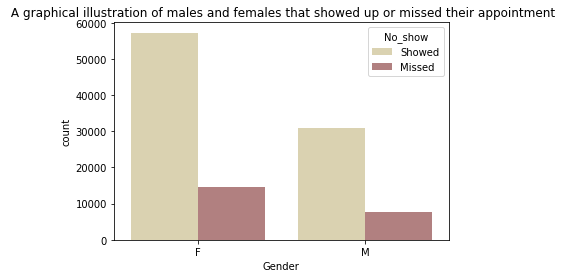

In [39]:
#Code to plot graph that shows the comparison between number of females and males that showed up or missed their appointment

ax = sns.countplot(x=df.Gender, hue=df.No_show, data=df, palette = 'pink_r')
ax.set_title(" A graphical illustration of males and females that showed up or missed their appointment")
x_ticks_labels=['female', 'male']
plt.show();

### Observation


<a id='conclusions'></a>
## Conclusions
After analysis, it is seen that: 
1) recieving SMS did not really have significant impact on showing up for appointment. in other words, from this dataset there was was no way to ascertain that it was becausepatients did not recieve sms that was why they did not show up for appointment
2) age is an important factor that can influence a patient from not showing up to a medical appointment. 
3) 78.81% of patients showed up for their appointment and 20.19% missed their appointment. Furthermore, the female gender showed up more to medical appointments than males.



###  LIMITATION:
One major limitation was the interpretability of the 'No_show' column. There was a need to make modifications to the No_show column.

### SUGGESTION: 
I humbly suggest that the dataset should include the following columns: proximity of patients house to the hospital and the means of transporation that can be used. This will help us to know if distance


It could have been helpful to see if the distance from the patient's home to the hospital is a factor that influence whether or not a patient would show up for an appointment.

In [ ]:
## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [442]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0